***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [5. Imaging](5_0_introduction.ipynb)  
    * Previous: [5. Introduction](5_0_introduction.ipynb)  
    * Next: [5.2 Sampling and Point Spread Functions](5_2_sampling_functions_and_psfs.ipynb)

***

导入标准模块

Import standard modules:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

导入本节特定模块

Import section specific modules:

In [4]:
import matplotlib.image as mpimg

In [5]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

***

## 5.1 空间频率<a id='imaging:sec:spatial'></a>

## 5.1 Spatial Frequencies<a id='imaging:sec:spatial'></a>

首先，通过[van Cittert–Zernike theorem &#10142;](../4_Visibility_Space/4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb)在观测天空和可见度采样间建立傅立叶关系对，即可见度采样的傅立叶变换得到天空图像，天空图像的傅立叶变换得到可见度采样。在深入研究射电干涉综合孔径成像细节之前，我们将先研究空域（图像）和空间频率域（可见度）之间的联系。首先是连续两个域的数学基础，即傅立叶变换，对简单信号进行两个域之间的傅立叶变换，从而理解一个域中的信号在另一个域中的样子。这是我们在利用干涉阵可见度进行天空图像重建之前，必须要掌握的基础原理。

对于第一近似，通过[范西特-泽尼克定理](../4_Visibility_Space/4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb) 可知观察到的天空和采样的可见度具有傅里叶对的关系，即采样的可见度进行傅立叶变换就是观测天空的图像，反之观察到天空图像的傅里叶变换即为采样的可见度。在我们深入研究使用孔径合成的无线电干涉成像的细节之前，我们将*探讨*将空间域（即图像）与空间频率域（即可见度）相关联的想法。为此，我们将从傅立叶变换开始，这是与两个域相关的数学运算。使用该框架，我们将在两个域之间通过转换简单信号来了解一个域中的信号如何在另一个域中呈现。在开始根据观察到的干涉测量阵列的可见度来构建天空图像之前，我们需要理解这些基础概念。

To first approximation, the observed sky and sampled visibilites have a Fourier pair relationship via [van Cittert–Zernike theorem &#10142;](../4_Visibility_Space/4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb), that is the Fourier Transform of the sampled visibilites is an image of the observed sky, and the Fourier Transform of the observed sky image is the sampled visibilities. Before we dive into specifics of radio interferometric imaging using aperture synthesis, we will cover the ideas which relate the spatial domain (i.e. an image) to the spatial frequency domain (i.e. the visibilities). To do this we will start with the Fourier transform which is the mathematics that relate the two domains. Using that framework we will transform simple signals between the two domains to understand how the a signal in one domain appears in the other. This is the groundwork we need to understand before we can start constructing sky images from the observed visibilities of an interferometric array.

### 5.1.1 二维傅里叶变换<a id='imaging:sec:ft2d'></a>

### 5.1.1 The Fourier Transform in Two Dimensions<a id='imaging:sec:ft2d'></a>

我们从数学入手，很快转到一些可视化例子，这些例子对理解傅立叶变换非常有用。
如[$\S$ 2.4 &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb)所述，连续一维函数$f(x)$的傅里叶变换如下：

We will start with a bit of mathematics, but will soon move to some visual examples which are often more useful to get started to learn about Fourier transforms.

As described in [$\S$ 2.4 &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb) the Fourier Transform of a continuous, 1-dimensional function $f(x)$ is

\begin{equation}
g(t) = \int_{-\infty}^{\infty} f(x) e^{-2\pi i xt} dx
\end{equation}

离散一维函数 $f(x)$的傅里叶变换 (DFT) [$\S$ 2.8 &#10142;](../2_Mathematical_Groundwork/2_8_the_discrete_fourier_transform.ipynb)为：

The discrete Fourier transform (DFT) [$\S$ 2.8 &#10142;](../2_Mathematical_Groundwork/2_8_the_discrete_fourier_transform.ipynb) of a discrete, 1-dimensional function $f(x)$ is

$$g(t) = \sum_{-\infty}^{\infty} f(x) e^{-2\pi i xt} dx$$

符号 $g \rightleftharpoons f$ 表示 $f$ 和 $g$ 是 *傅里叶对*，也就是说，如果$g$ 是$f$的傅里叶变换, 则$f$是$g$的傅里叶逆变换.


The notation $g \rightleftharpoons f$ denotes that the function $f$ and $g$ are *Fourier pairs*, that is if $g$ is the Fourier transform of $f$, then $f$ is the inverse Fourier transform of $g$.

二维傅里叶变换是每个维度中傅里叶变换的简单乘积（因为每个维度都是正交的）。

A 2-dimensional Fourier transform is simply the product of the Fourier Transform in each dimension (as each dimension is orthogonal).

$$ I(l,m) = \int_{-\infty}^{\infty} V_u(u) e^{-2\pi iul} \,du \int_{-\infty}^{\infty} V_v(v) e^{-2\pi ivm} \, dv = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} V(u,v) e^{-2\pi i(ul+vm)} \,du\,dv $$

根据欧拉公式 $e^{ix} = \cos x + i \sin x$，上式可以扩展为：

By Euler's forumla, $e^{ix} = \cos x + i \sin x$, this can be expanded to

$$ I(l,m) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} V(u,v) (\cos(2\pi(ul+vm)) - i\sin(2\pi(ul+vm))) \,du\,dv $$

如果 $I(l,m)$ 表示一幅图像，即一个离散的二维函数，那么$I(l,m)$ 可以表示为可见度 $V(u,v)$的傅里叶变换。根据欧拉公式，傅里叶变换中的可见度被分解为正弦和余弦函数。

If $I(l,m)$ represents an image, i.e. a discrete 2-dimensional function, then we see that $I(l,m)$ can be represented as the Fourier Transform of the visibilities $V(u,v)$. By Euler's formula the Fourier Transform is the decomposition of the visibilties into sine and cosine functions.

<a id="eq:dft2_IV"></a>
$$ I(l,m) = \sum_{u=-\infty}^{\infty} \sum_{v=-\infty}^{\infty} V(u,v) (\cos(2\pi(ul+vm)) - i\sin(2\pi(ul+vm))) \,\Delta u\,\Delta v $$

由于图像与可见度关系可以近似为一个 $I \rightleftharpoons V$的傅里叶对，因此可见度 $V(u,v)$ 就可以描述成图像 $I(l,m)$的正弦/余弦分解。

As the image-visibility relation can be approximated as a Fourier pair $I \rightleftharpoons V$, the visibilities $V(u,v)$ can be described as the sine/cosine decomposition of the image $I(l,m)$

<a id="eq:dft2_VI"></a>
$$ V(u,v) = \sum_{l=-1}^{1} \sum_{m=-1}^{1} I(l,m) (\cos(2\pi(ul+vm)) + i\sin(2\pi(ul+vm))) \,\Delta l\,\Delta m $$

图像和可见度之间的近似关系是综合孔径干涉测量的基础，可以从多个角度解释这种关系。一种解释是，天空主要由被称为恒星或者星系或者星团的点源实体构成，它们是“不可解析”源或者”delta 函数“。公式 [above &#10549;](#eq:dft2_VI)表明，图像中的delta函数在可见度域内是一个复杂的正弦波，反之亦然。这意味着为了探测图像域中的一个点源，我们不需要对其可见度空间进行全采样，换句话说，信号在一个域中稀疏（图像），在另一个域中密集（可见度）。对于射电观测来说，我们的优势在于，在一个信号展开到整个空间的域中进行测量，然后把测到的信号转换成一个我们更想要但是却更稀疏的域。

        The approximation of the relation between the image and visibilities is fundamental to using interferometry for aperture synthesis. There are many ways to interpret this relationship. A useful idea is that the sky is made up of mostly 'point source' objects which one might call stars or galaxies or blobs. Whatever these are, they are 'unresolved' sources or *delta functions*. Equation [above &#10549;](#eq:dft2_VI) states that a delta function in an image is a complex sinusoidal wave in the visibility domain and vica-versa. This means that one does not need to fully sample the visibility space to detect a point source in the image domain. Put in other words, this is an issue a signal being sparse in one domain (image) and dense in another domain (visibility). It is to our advantage to make a measurement in a domain where the signal is spread through-out the space and then transform the observed signal into a more preferable (but sparser) domain.

为了理解上述干涉成像的核心概念，让我们看几个例子，希望以直观的方式建立起图像-可见度之间的傅立叶关系。

To understand this concept which is the core of interferometric imaging lets look at a few examples which will hopefully start to create some intuition about the image-visibility Fourier relationship.

### 5.1.2 图像的傅里叶变换<a id='imaging:sec:ftImage'></a>

### 5.1.2 The Fourier Transform of an Image<a id='imaging:sec:ftImage'></a>


让我们从通用图像看起。第一张是Umberto Boccioni的画作，名叫Dynamism of a Cyclist，另外一张是鸭子图，图中有一只完整雄性野鸭，和一只雌性野鸭的局部。

Let us start by looking at some generic images, the first is a painting by Umberto Boccioni called *Dynamism of a Cyclist* and the other is a duck (well, one full male mallard and part of a female mallard).

在图上施加傅立叶变换，然后看变换后的效果。注意，本节我们用的都是离散傅立叶变换[fast Fourier Transform &#10142;](../2_Mathematical_Groundwork/2_8_the_discrete_fourier_transform.ipynb)，而且假定对信号进行规则采样（即网格采样），我们将在 [$\S$ 5.3](5_3_gridding_and_degridding.ipynb)讨论非规则采样的网格化。

Let us start by looking at the effect applying a Fourier Transform to an image. Note, through out this section we will be using the discrete [fast Fourier Transform &#10142;](../2_Mathematical_Groundwork/2_8_the_discrete_fourier_transform.ipynb). The transformation of irregularly sampled visibilities to a regularly gridded array is discussed in [$\S$ 5.3](5_3_gridding_and_degridding.ipynb), for now we will only assume our signal is regularly sampled (i.e gridded).



In [6]:
#soccer = mpimg.imread('figures/WLA_moma_Umberto_Boccioni_Dynamism_of_a_Soccer_Player_1913_512.png')
cyclist = mpimg.imread('figures/Umberto_Boccioni_Dynamism_of_a_Cyclist_512.png')
duck = mpimg.imread('figures/Anas_platyrhynchos_male_female_quadrat_512.png')

简单期间，首先把RGB的彩色图转换成灰度图：

For simplicity convert the RGB-color images to grayscale:

In [9]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b #standard grayscale conversion
    return gray

gCyclist = rgb2gray(cyclist)
gDuck = rgb2gray(duck)

首先在空域（也就是我们通常所看到的域）中显示图像。我们使用空域术语来描述信号，在空域中，信号直接按照信号间的物理距离排列，例如，在下面的鸭子图中，鸭子的眼睛离鸭头近离鸭脚远，这跟真实世界是一致的。也许你会好奇为什么会提到这么一个看上去非常简单的概念，原因在于，一旦我们步入空间频率域，我们就会失去这一简单的直观，需要用空域关系来重新获得直观感受。

Start by displaying the images in the *spatial domain*, i.e. the domain we usually look at images in. We use the term spatial domain to describe signals which are ordered by a distance which is directly related to the physical distance between the two signals, e.g. for the duck image below the eye is close to the head and far away from the foot as it is in the real world. This may seem like such a simple concept and you may wonder why the point is even being made. But, once we step into the *spatial frequency domain* our intution will be lost and we need to use the spatial domain relationship to try to regain our footing.

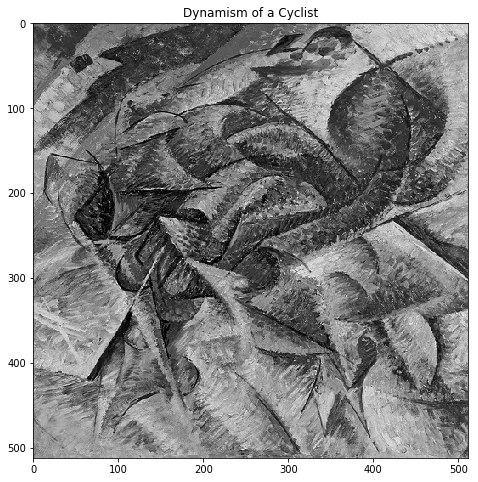

In [10]:
fig = plt.figure(figsize=(8,8))
plt.title('Dynamism of a Cyclist')
img0plot = plt.imshow(gCyclist)
img0plot.set_cmap('gray')
#fig.savefig("cyclist_gray.png", bbox_inches='tight', pad_inches=0)

*Figure: Dynamism of a Cyclist by Umberto Boccioni*

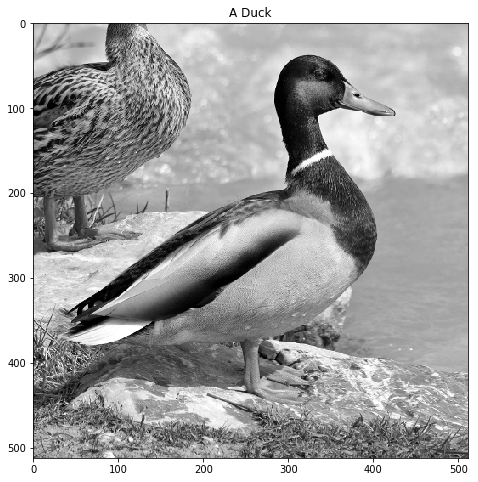

In [11]:
fig = plt.figure(figsize=(8,8))
plt.title('A Duck')
img1plot = plt.imshow(gDuck)
img1plot.set_cmap('gray')
#fig.savefig("duck_gray.png", bbox_inches='tight', pad_inches=0)

*Figure: A Duck*

空域中，通过我们的眼睛和视觉感知能清楚分辨出，这是两张不同的图像。看上去非常明显，它们当然是非常不同的两张图，然而，这一切都是基于我们已经很好的理解了空域中的信号。

With our eyes and visual learning to understand signals in the spatial domian these are clearly two different images. This may seem like an obvious point, of course they are very different images, but that is because we have learned to understand signals in the spatial domain very well.

把空域中的信号分解成复杂的正弦波，就得到了信号在空间频率域的表现。下一节内容我们将给出几个简单例子，希望对这一领域有一些深入理解。这里打个简单的比方，我们正在用一堆不同大小的画刷，用不同的笔触角度，画一幅空域的画，那么空间频率域中的一个点可以看成是，用某一规格的画刷，用某一笔触角度，进行多次绘制的结果；采用同一规格的画刷，用所有可能的笔触角度绘出的点，在空间频率域上与中心零频率的距离相等，即分布在相同半径的圆上。用适合刻画细节的小画刷画出的点距离中心较远，用适合画大结构（如平坦背景）的大画刷画出的点距离中心较近。同时，相对于小画刷来说，大画刷不需要太多的笔触角度，因此，在空间频率域中，大画刷只需要少量的点就能完整表达。


The *spatial frequency domain* represents the decomposition of a spatial domain signal into complex sinusoidal waves. In the next section we will look at some simple examples which hopefully provide some insight into this domain. A useful metaphor here is to that of painting an image with a number different-sized paint brushes at different stroke angles. The painting is the spatial-domain image, and one can think of a point in the spatial-frequency domain as representing the amount of paint (in our case, a complex power) applied using a specific brush size at a specific stroke angle. In the spatial frequency domain, all points at the same radius represent the same sized paint brush but at all possible stroke angles. And, points further out represent smaller paint brushes (that is the brushes which can do fine details) compared to points closer to the centre which are for the large structures such as flat backgrounds. Additionally, not as much stroke angle control is required for the large paint brushes compared to the smaller brushes, so only a few points are need in the spatial frequency domain to fully represent a large brush.

现在，让我们通过二维傅立叶变换进入到空间频率域。在变换得到的复二维矩阵中，中心的像素点代表低频，或者原图的大尺度结构，矩阵边缘的点代表高频，或者原图的精细结构。高频分量表示图像的细节。

Now, let us take a step in the spatial frequency domain via a 2-dimensional Fourier Transform. This results in a complex 2-d array where the pixels closest to the centre of the array represent the low-frequency, or 'large-scale', structure of the original image. At the edge of the array are the high-frequency, or 'fine-scale', structure of the image. The high-frequency components represent the details of the image.

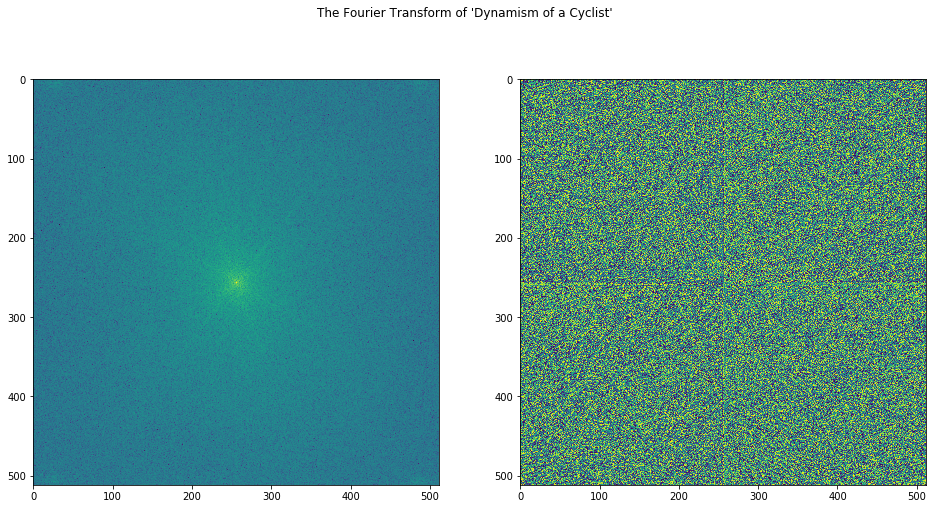

In [8]:
fftCyclist = np.fft.fftshift(np.fft.fft2(gCyclist))
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of \'Dynamism of a Cyclist\'')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftCyclist))) #amplitude (decibels)
plt.subplot(1,2,2)
plt.imshow( np.angle(fftCyclist)) #phase
#fig.savefig("soccer_fft_gray.png", bbox_inches='tight', pad_inches=0)

*图：‘Dynamism of a Cyclist’的傅立叶变换结果，左图是幅值（分贝），右图是相位。Figure: Amplitude, in decibels, (left) and the phase (right) of the Fourier transform of 'Dynamism of a Cyclist'*

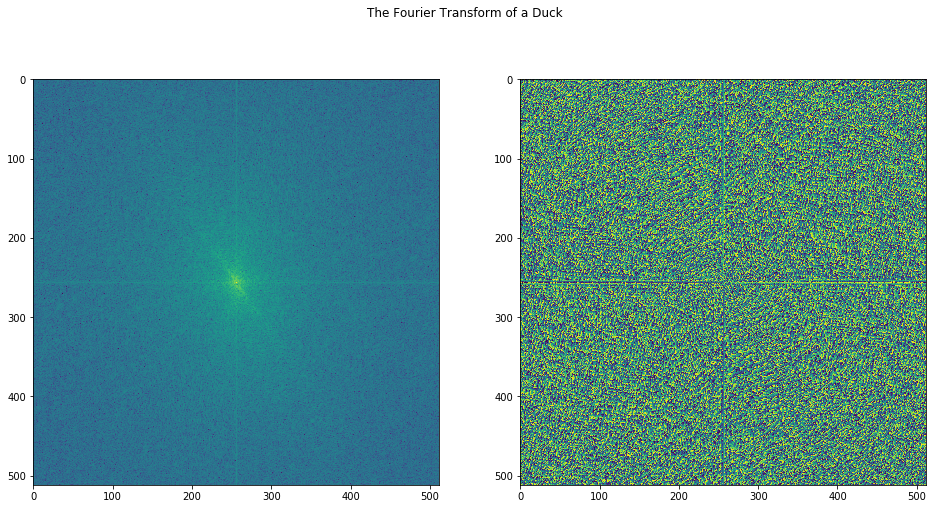

In [9]:
fftDuck = np.fft.fftshift(np.fft.fft2(gDuck))
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of a Duck')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftDuck))) #amplitude (decibels)
plt.subplot(1,2,2)
plt.imshow(np.angle(fftDuck)) #phase
#fig.savefig("duck_fft_gray.png", bbox_inches='tight', pad_inches=0)

*图：野鸭图的傅立叶变换结果，左图是幅值（分贝），右图是相位。Figure: Amplitude, in decibels, (left) and the phase (right) of the Fourier transform of a duck*

从左边的幅值图可以看出，多数能量集中在中间区域，即信号的主要部分可以用大尺度或者低频正弦波来表示。在绘制幅值图的时候，如果不先进行对数比例调整，我们将只看到图的中间有几个明亮像素点。相位图中，相位值从$-2\pi$ 到 $2\pi$ 随机分布，有一些连贯的结构从左往右，从上到下穿过图的中心。相位图能得到的主要结论是，复杂的图（比如例子中的野鸭图），其相位结构也会很复杂。

As can be seen in the amplitude figures on the left the majority of the power is in the central region, i.e. the majority of the signal can be represented with large scale, or low-frequency sinusoidal waves. Try plotting the amplitudes without first rescaling them logarithmically and you should see only a few bright pixels in the middle of the figure. In the phase figures the values range from $-2\pi$ to $2\pi$ and are fairly random. There is some coherent structure that goes left to right and top to bottom passing through the centre of the figure. The main insight to gain from the phase figure is that given a complex image, of say a duck for example, leads to very complex phase structure.

这里提出一个有意思的问题：哪个更重要，幅值还是相位？听起来这似乎是一个很奇怪的问题，因为直觉告诉我们，幅值和相位都很重要，缺一不可。然而事实证明，相位包括了大多数的结构信息。让我们先看看这句话的意思，然后解释为什么。先交换两幅图的相位信息，看会产生什么效果。

An interesting question to consider is 'which is more important, amplitude or phase?' This seems like an odd question, because intuition would seem to indicate that both amplitude and phase information is needed. It turns out that phase information contains most of the structural information. Let us start by taking a look at what this means, and then get into why this is the case. Start by switching the phase information of the two images.

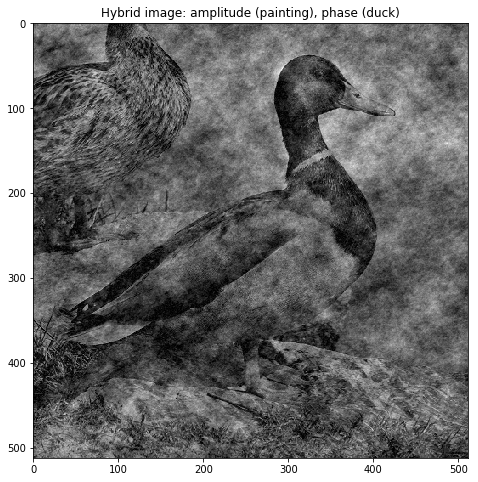

In [10]:
fig = plt.figure(figsize=(8,8))
plt.title('Hybrid image: amplitude (painting), phase (duck)')
phs = np.angle(fftDuck) #phase of the duck
amp = np.abs(fftCyclist) #amplitude of the painting
fftHybrid = amp * (np.cos(phs) + 1j * np.sin(phs)) #construct an image with the phase of a duck and amplitude of the painting
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(fftHybrid))) #compute the inverse Fourier Transform
hybridPlot = plt.imshow(hybrid)
hybridPlot.set_cmap('gray')
#fig.savefig("hybrid_phs_duck_amp_cyclist.png", bbox_inches='tight', pad_inches=0)

*图：'Dynamism of a Duck'，'Dynamism of a Cyclist'图的幅值+野鸭图的相位。Figure: 'Dynamism of a Duck', reconstructed hybrid image using the spatial frequency amplitudes of 'Dynamism of a Cyclist' and the phases of the duck.*

惊人的结果出现了。我们从两张图中各取一半的信息，组合起来以后，我们看到的是鸭子而非那幅名为'Dynamism of a Cyclist'的画作，而且，新的画面上，完全看不出任何'Dynamism of a Cyclist'的信息。当我们把鸭子图的幅值跟'Dynamism of a Cyclist'的相位合成到一起，看到的又只有'Dynamism of a Cyclist'而非鸭子了。

This seems kind of like an amazing thing to see, we have combined the two images (using half the information from each) and clearly we see a duck and not the painting. In fact, the painting is not visable at all. When we instead use the phase of the painting and the amplitude of the duck we now see the painting and not the duck.

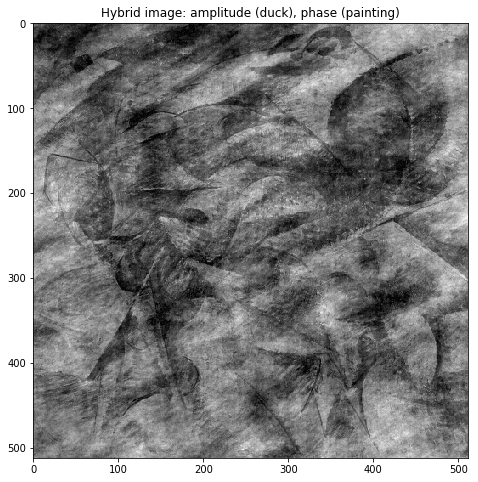

In [11]:
fig = plt.figure(figsize=(8,8))
plt.title('Hybrid image: amplitude (duck), phase (painting)')
phs = np.angle(fftCyclist) #phase of the painting
amp = np.abs(fftDuck) #amplitude of the duck
fftHybrid = amp * (np.cos(phs) + 1j * np.sin(phs)) #construct an image with the phase of a painting and amplitude of the duck
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(fftHybrid))) #compute the inverse Fourier Transform
hybridPlot = plt.imshow(hybrid)
hybridPlot.set_cmap('gray')
#fig.savefig("hybrid_phs_soccer_amp_duck.png", bbox_inches='tight', pad_inches=0)

*图：'Dynamism of a Duck (Redux)'，鸭子的幅值+'Dynamism of a Cyclist'的相位。Figure: 'Dynamism of a Duck (Redux)', reconstructed hybrid image using the spatial frequency amplitudes of the duck and the phases of 'Dynamism of a Cyclist'.*

从两幅混合图来看，从中提取相位的图占了主导，但是相对于原始的两幅图像，重构图像都不完美。两幅混合图中都有噪声，<font color=red>幅值信息起了作用</font>。混合图中的噪声源于两张原始图像不相关，因此，不可能一幅图的幅值不可能匹配上另一幅图的相位。

Though with both hybrid images the image in which the phase is extracted from dominates they are not perfect reconstructions of only one image. In both there is now a sheen of noise across the images. The amplitude information plays a role. This noisiness of the hybrid image is due to the fact that the two original images are effectly uncorrelated, i.e. they are not related. So, one would not expect the amtplitude and phase information from one to match the other.

如果不把'Dynamism of a Cyclist'的幅值换给鸭子，而只是把鸭子图中所有的幅值都置为1，结果会怎么样呢？也就是说，扔掉幅值信息，只保留相位信息，我们会得到怎样的图像效果呢？

What would happen if instead of swapping the amplitude information of the duck for the painting we just set all the amplitude of all the pixels to one? That is, we effectively throw out any amplitude information and make a phase information-only image?

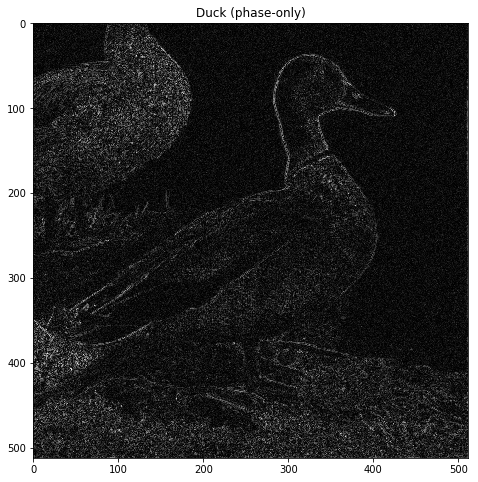

In [24]:
fig = plt.figure(figsize=(8,8))
plt.title('Duck (phase-only)')
phs = np.angle(fftDuck)
amp = 1.*np.ones_like(fftDuck) #set all the amplitude values to 1
fftPhsImg0 = amp * (np.cos(phs) + 1j * np.sin(phs))

phsImg0 = np.abs(np.fft.ifft2(np.fft.fftshift(fftPhsImg0)))
phsImg0Plot = plt.imshow(phsImg0)
phsImg0Plot.set_cmap('gray')
#fig.savefig("phs_only_duck.png", bbox_inches='tight', pad_inches=0)

*图：鸭子相位重建图。幅值都置为1。Figure: reconstructed image of a duck using only the phase information by setting all the amplitudes to unity.*

只用了相位信息的鸭子图中，鸭子依然可见，同时，也出现了一些有趣的东西。只有类似鸭子身上的小毛这样的细节（即高频结构），以及轮廓（即边缘）可见。本章后面我们会讲到，把每个幅值置为1，事实上相当于在原图基础上做了一个“权重函数”，该函数强调了图中的精细结构或者说是高频结构，弱化了类似水背景这样的大尺寸结构。

The duck is still visibale when we only use the phase information, but now we see something interesting. Only the fine details (i.e. the high-frequency structure) like the little feathers and the outline (edges) are visible. We will get to this later in the chapter but by setting every ampltiude pixel to 1 we have created a *weighting function* which will favour the fine-scale or high-frequency structure in the image over the large-scale structure such as the background water.

同样的技巧，我们用在幅值信息上试试看，也就是把原图的相位都置为0，重建后会得到什么样的效果。

Can we do the same trick with using only amplitude information, i.e. reconstruct the image after setting all the phases to zero?

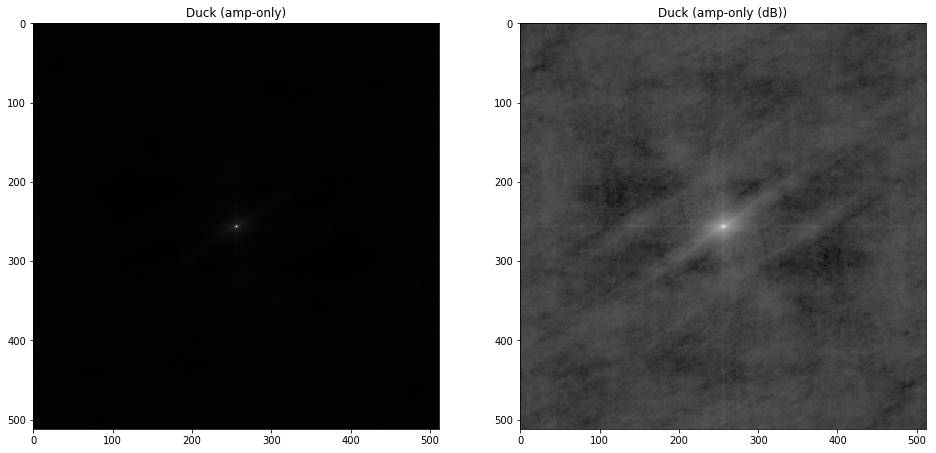

In [20]:
fig, axes = plt.subplots(figsize=(16,8))
plt.title('Duck (amplitude-only)')
phs = np.zeros_like(fftDuck) #set the phase information to 0
amp = np.abs(fftDuck)
fftAmpImg0 = amp

plt.subplot(1,2,1)
plt.title('Duck (amp-only)')
ampImg0 = np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0))) 
#ampImg0 = np.abs(np.fft.ifft2(np.fft.fftshift(fftAmpImg0)))
ampImg0Plot = plt.imshow(ampImg0)
ampImg0Plot.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Duck (amp-only (dB))')
ampImg0deci = 10.*np.log10(np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0))))
#ampImg0deci = 10.*np.log10(np.abs(np.fft.ifft2(np.fft.fftshift(fftAmpImg0))))

ampImg0deciPlot = plt.imshow(ampImg0deci)
ampImg0deciPlot.set_cmap('gray')
#fig.savefig("amp_only_duck.png", bbox_inches='tight', pad_inches=0)

*图：鸭子的幅值重建图，相位置为0。左图为线性结果，右图做了对数变换处理（单位分贝）。Figure: reconstructed image of a duck using only the amplitude information by setting all the phases to zero. Left is in linear and right is in logarithmic (decibel) scale.*

事实证明，仅用幅值信息，得到的几乎是一张空图，能量分布在图的中心位置。对数变换以后的结果跟前面展示的傅立叶变换的幅值图类似。相位和幅值信息可以
这样解释，即相位描述图的结构，也就是能量的所在位置，而幅值描述的是某位置上的结构密度。所有正弦波的相长干涉和相消干涉导致了图像的重建，把所有正弦波的幅值置为1，各波间的干涉依然存在，因此重建得到了部分图像；如果去掉相位信息，则各波间不存在干涉，因此重建图中只剩下噪声。

As it turns out, using only the amplitude information results in an almost empty image with some power spread over the centre of the image. Taking the logarithm of the image results in something similar to the amplitude figure of the Fourier transformed image shown earlier in the section. A way to think about the phase and amplitude information is that phase information describes the structure of an image, that is, where the power needs to be placed. And ampltiude information describes the intensity of that structure given a position. The constructive and destructive interference of all the sinusoidal waves leads to a reconstruction of the image. If the amplitudes of all the sinusoidal waves is unity then there is still interference between the waves leading to a partial image. But, if that phase information is gone then there will be no interference and there will only be noise in the reconstructed image.

这是一个非常重要的思想，后面在讲到干涉测量可见度采样和权重函数的时候还会碰到，到那时候，你将会看到，我们采用幅值来从可见度中过滤出结构。这里我们只是提前简单提到，后面会有充足时间进一步讲解。

This is an important idea that will come up again soon when we consider interferometric visibility sampling and weighting functions. You will see that we can play with the amplitudes to filter structure out of visibilities. But, we are getting ahead of ourselves here, time enough for that later.

再来看看，重建过程中，我们只用到实部或者虚部，结果会怎么样？

As an aside, what happens when we only use the real or imaginary information to reconstruct the image?

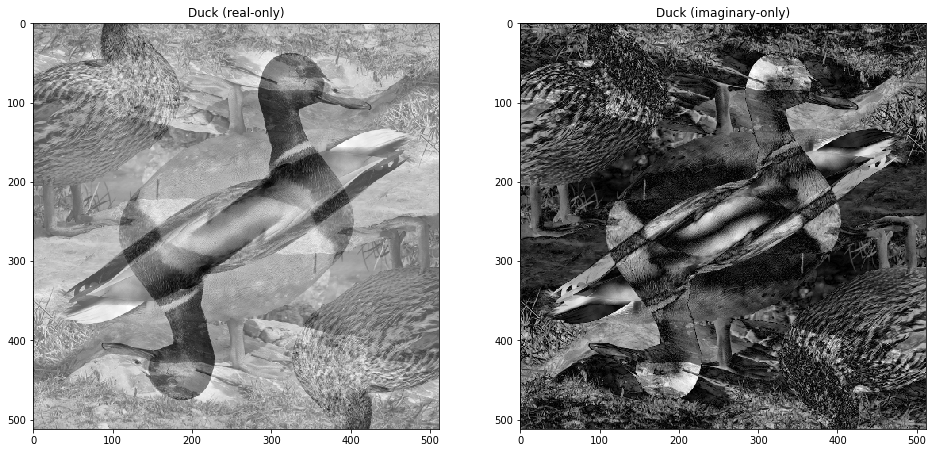

In [22]:
fig, axes = plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Duck (real-only)')
fftRealImg1 = fftDuck.real
#realImg1 = np.abs(np.fft.ifft2(fftRealImg1))
realImg1 = np.abs(np.fft.ifft2(np.fft.fftshift(fftRealImg1)))
plt.imshow(realImg1)
plt.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Duck (imaginary-only)')
fftImagImg1 = 1j * fftDuck.imag
imagImg1 = np.abs(np.fft.ifft2(fftImagImg1))
plt.imshow(imagImg1)
plt.set_cmap('gray')

*图：只用实部（左）或虚部（右）重建的鸭子图。Figure: reconstructed image of a duck using only the real components (left) and imaginary components (right).*

结果看上去有点复杂，然而其核心在于原始图像被严格实值化了。对图像进行傅立叶变换，其结果为复数（每个点都由实部和虚部构成），因此经过傅立叶变换的信号，在没有注入新信息的同时（因为是线性变换），信息量却扩大了一倍。经过傅立叶变换的信号沿对角线冗余，每一个对角线以上的值都能在对角线以下找到对应的值（也就是共轭）。如果我们只对实部进行逆傅立叶变换，得到的空域结果为原始图像跟旋转$180^{\circ}$以后的图像的叠加，之所以是“加”，原因在于共轭变换不改变实部的正负号。如果只对虚部进行逆傅立叶变换，得到的空域结果为原始图像减去旋转$180^{\circ}$以后的图像，之所以是“减”，原因在于共轭会改变虚部的正负号。

There seems to be a lot going on here, but the core of this effect is that the original image is strictly real-valued. When the image is Fourier transformed the resulting signal is now 'twice' the information because it is complex (there is a real and imaginary component at each point) but no new information has been created as it is a linear transform. The Fourier transformed signal is redundant along a diagonal axis, each value above the diagonal has an equivalent (conjugated) value below the diagonal. Now if only the real-component is used to inverse Fourier transform back to the spatial domain then this results in an image which is the sum of the original image and a $180^{\circ}$ rotated image, this is an addition because conjugation does not effect the sign of the real components. The imaginary-component image is the difference image of the original and a $180^{\circ}$ rotated image because the conjugation flips the imaginary sign.

本节的思路是从一张含有大量容易理解的结构或者信息的图像入手，对其进行傅立叶变换，得到令我们失去直观感受的一个新域，我们需要针对空间频率域建立起新的直觉，下一节，我们将从简单结构开始，从基本元素一步步构建图像。

The idea with this section has been to start with an image with a significant amount of structure (or information) which we can understand and then to transform that image into a new domain where our intution is lost. And, you may still be lost as we need to create some intution about the spatial frequency domain. In the next section we will start with simple structures to see how we can build up images out of basic components.

### 5.1.3 点源的傅立叶变换 The Fourier Transform of a Point Source<a id='imaging:sec:ftPoint'></a>

这里我们先不对包括复杂结构的图像进行傅立叶变换，相反，我们选择一些简单的图像，观察其傅立叶变换的结果。最简单的图像莫过于只有一个像素的图，或者也被称为“点源”，因为源不能被分解（在这个例子里，大小为单个像素或者更小），其中心像素强度为1。

Instead of looking at the Fourier Transform of an image with a large amount of structure let us examine a few simple images and the effect of applying a Fourier transform. The simpliest image one can make is an empty image with a single pixel, or what it is also called a *point source* as the source is not resolved (in this case the sizeof a single pixel or smaller), with unity intensity in the centre pixel.

FFT Max: 1.0 Min: 1.0


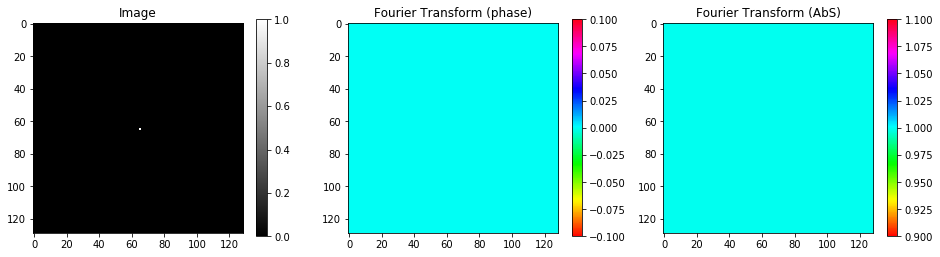

In [12]:
def pointSourceFFT(imgSize, ypos, xpos, amp=1.):
    img = np.zeros((imgSize+1, imgSize+1)) #odd sized array such that there is a central pixel
    img[ypos, xpos] = amp #make the central pixel have an intensity of 1
    fftImg = np.fft.fft2(np.fft.fftshift(img)) #compute the Fourier transform of the image
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,3,1)
    plt.title('Image')
    plt.imshow(img, interpolation='nearest')
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1,3,2)
    plt.title('Fourier Transform (phase)')
    plt.imshow(np.angle(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)

    plt.subplot(1,3,3)
    plt.title('Fourier Transform (amplitudes)')
    plt.imshow(np.abs(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)
    #amplitudes are all 1.
    print('FFT Max:', np.max(np.abs(fftImg)), 'Min:', np.min(np.abs(fftImg)))

imgSize = 128
pointSourceFFT(imgSize, (imgSize//2)+1, (imgSize//2)+1)

*左：中心像素亮度为1的点源图。右：点源图像的空间频率相位图，因为源正好位于图的中心，所以所有相位都为0。Left: a point source image, a simple image of a the centre pixel with unity intensity. Right: the spatial frequency phase of the point source image, all the phases are zero because the source is exactly in the middle of the image.*

中心像素点有亮度，其它像素点亮度都为0的图像，相当于一个宽度为像素大小的二维方波，而且随着图中像素点的增多，逐渐变为delta函数。从输出的最大幅值和最小幅值（都为1）可以看出，delta函数([$\S$ 2.4 &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb#math:sec:fourier_transform_of_diracs_delta_function))的傅立叶变换结果很平坦，为常量。当像素位于图的中心时，变换后的相位也是平坦的，但是随着该像素位置的改变，相位会呈现相应的“条纹模式”。把源向左移动一个像素，我们发现幅值不变，但是相位呈现从左往右排列的条纹。

An image with a single intensity pixel in the centre is equivalent to a 2-dimensional boxcar function with a width the size of the pixel, as the number of pixels in the image increases this approaches a delta function. The Fourier Transform of a delta function ([$\S$ 2.4 &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb#math:sec:fourier_transform_of_diracs_delta_function)) is a flat field of constant value as can be seen by printing the maximum and minimum amplitudes, they are both 1. When the pixel is at the centre of the image the phase is also flat, but as the position of the pixel is changed the phase will show a *fringe pattern* related to the position. Moving the source position by a single pixel to the left by one pixel the amplitude remains the same but now a fringe pattern appears left to right across the phase.

FFT Max: 1.0 Min: 0.9999999999999998


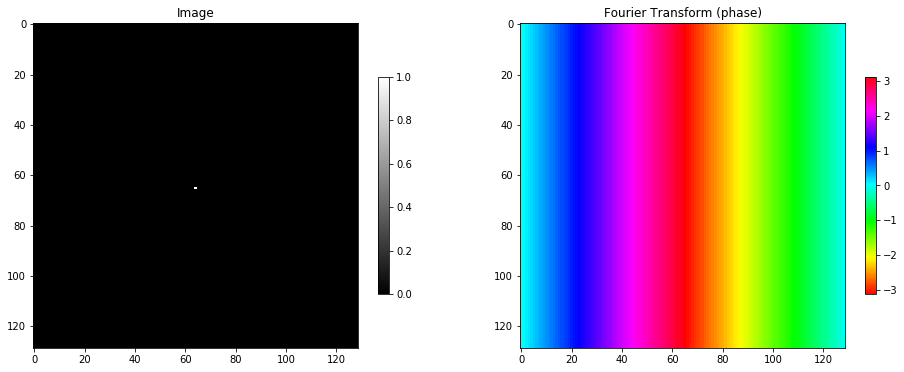

In [31]:
imgSize = 128
pointSourceFFT(imgSize, (imgSize//2)+1, (imgSize//2))

*左：点源图，点源位于图中央偏左一个像素位置，亮度为1；右：点源的空间频率相位图。Left: a point source image, a simple image of a pixel with intensity 1, offset from the centre by one pixel to the left. Right: the spatial frequency phase of the point source image.*

从上面的相位图可以看出，在y方向上（x固定不变），相位为常数，在x方向上，相位正好变了一圈。

From the phase plot we see that the phase is constant in $y$ with respect to the a fixed $x$ position, and rotates around the unit circle once in the $x$ direction.

接下来，我们把源往下移动一个像素，条纹变成了从上往下的排列。

Instead, moving the position one pixel up from the centre the fringe pattern is now top to bottom.

FFT Max: 1.0 Min: 0.9999999999999998


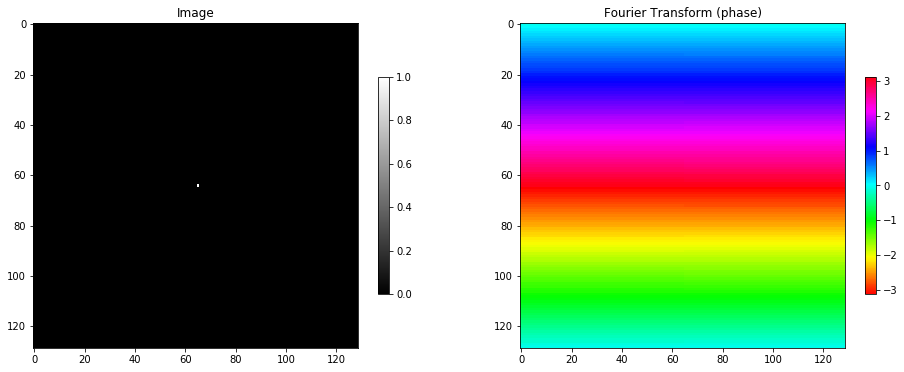

In [32]:
imgSize = 128
pointSourceFFT(imgSize, imgSize//2, (imgSize//2)+1)

*左：点源图，点源位于图的中央偏上一个像素位置，亮度为1；右：该点源的频域相位图。Left: a point source image, a simple image of a pixel with intensity 1, offset from the centre by one pixel up. Right: the spatial frequency phase of the point source image.*

从上面三个例子可以看出，傅立叶变换得到的最大最小幅值始终维持不变，但是相位图不一样，从相位方向可以看出点源相对图像中央的位置变化。从下面的例子，我们可以看到，随着点源与图中央距离增加，相位的变化频率随之增加。

With the past three examples the minimum and maximum amplitudes have remained the same but we see different phase plots. The direction of the phase indicates the position of the point source relative to the centre of the image. Now we will see that by moving the point source away from the centre the phase frequency will increase.

FFT Max: 1.0 Min: 0.9999999999999998
FFT Max: 1.0000000000000002 Min: 0.9999999999999998
FFT Max: 1.0 Min: 0.9999999999999999
FFT Max: 1.0000000000000002 Min: 0.9999999999999998


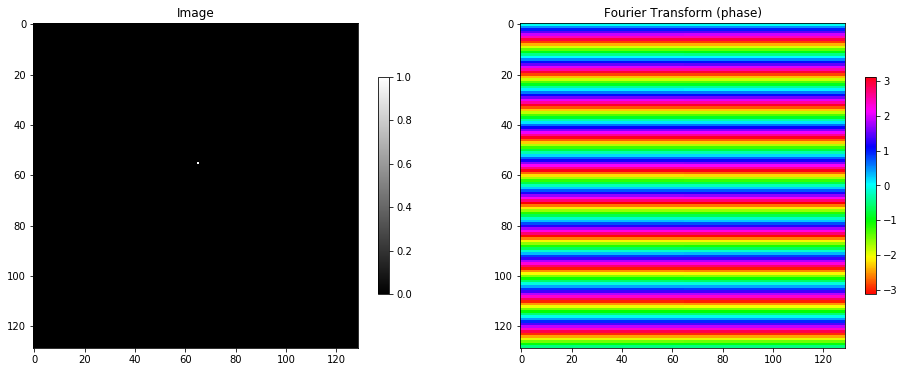

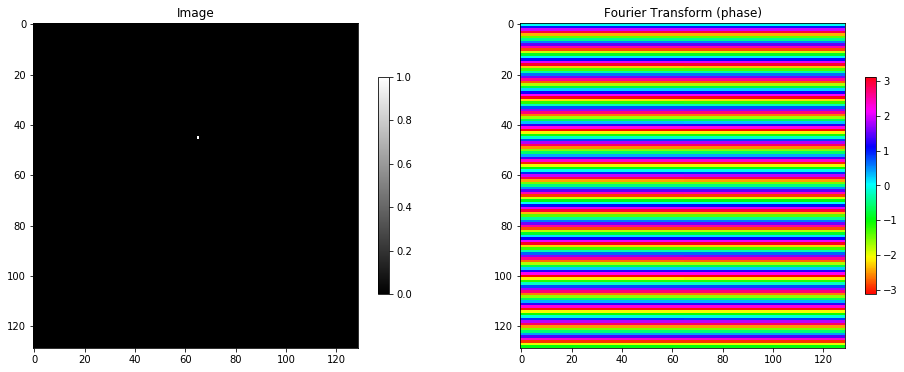

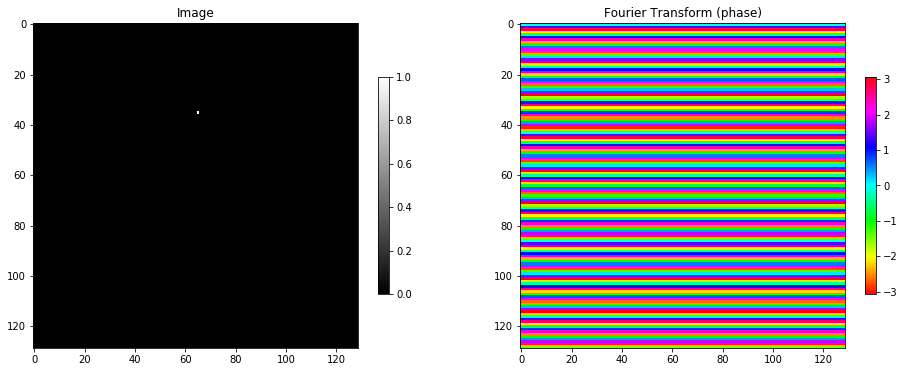

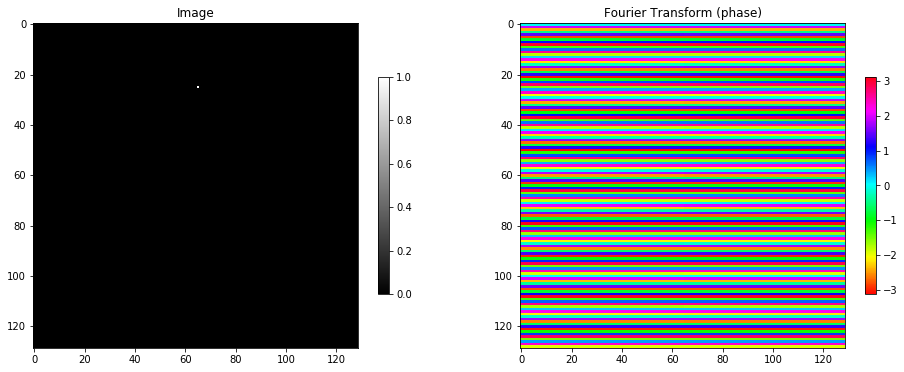

In [35]:
imgSize = 128
pointSourceFFT(imgSize, (imgSize//2)+1 - 10, (imgSize//2)+1) #offset the point source 10 pixels north above the centre

pointSourceFFT(imgSize, (imgSize//2)+1 - 20, (imgSize//2)+1) #offset the point source 20 pixels north above the centre

pointSourceFFT(imgSize, (imgSize//2)+1 - 30, (imgSize//2)+1) #offset the point source 30 pixels north above the centre

pointSourceFFT(imgSize, (imgSize//2)+1 - 40, (imgSize//2)+1) #offset the point source 40 pixels north above the centre

*左：只有一个像素亮度为1的点源图像，点源逐步偏离图像中心。右：点源的空间频率相位。Left: a point source image, a simple image of a pixel with intensity 1, progressively offset from the centre. Right: the spatial frequency phase of the point source image.*

点源离图像中心越源，相位转的越快，也可以表述成条纹频率越大。

The further the point source is from the centre the faster the phase rotates, one would also say that the fringe frequency increases.

固定点源到中心的距离，让点源绕中心一圈，我们会看到，条纹的频率不变，但是方向发生改变。注意，左图的圆只是作为参考，不是图像的内容。

By fixing the distance of the point source to the phase centre but rotation the position around a circle we see that the frequency does not change but the direction of the fringe changes. Note, the circle is drawn on the plot for reference, but is not part of the image.

FFT Max: 1.0 Min: 0.9999999999999998
FFT Max: 1.0000000000000002 Min: 0.9999999999999996
FFT Max: 1.0 Min: 0.9999999999999998
FFT Max: 1.0000000000000002 Min: 0.9999999999999996
FFT Max: 1.0 Min: 0.9999999999999998


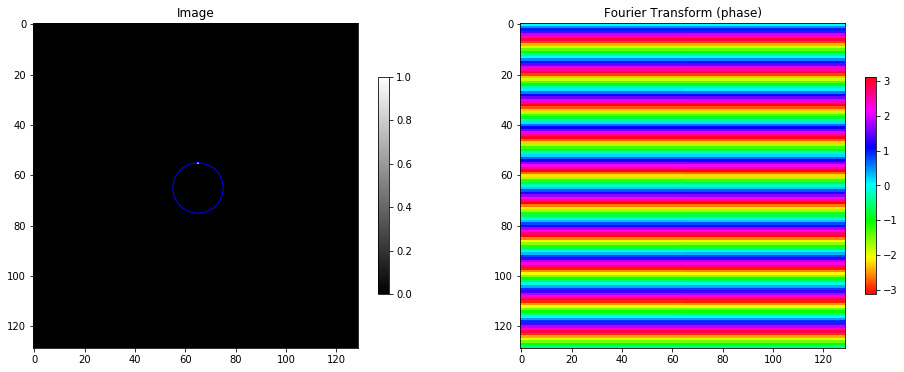

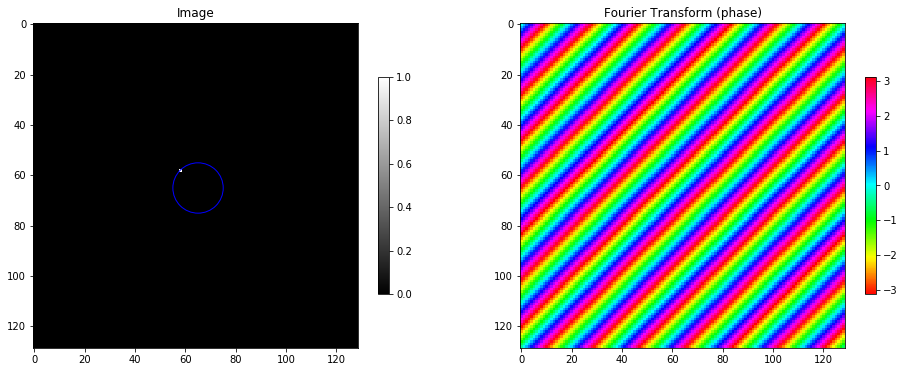

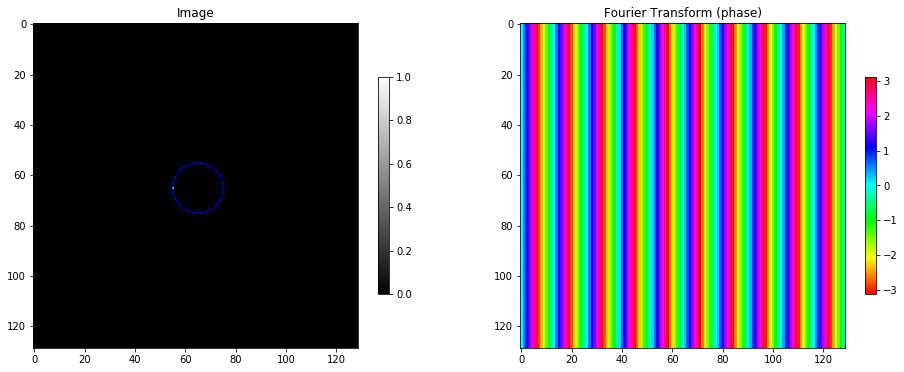

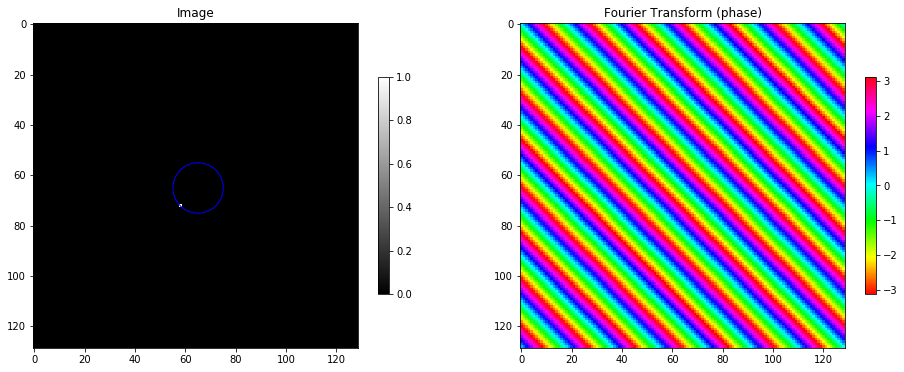

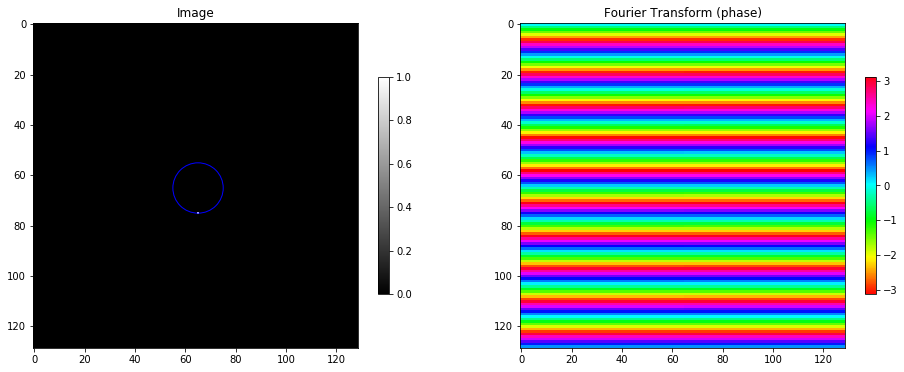

In [37]:
def pointSourceFFTCircle(imgSize, ypos, xpos, amp=1., radius=10.):
    img = np.zeros((imgSize+1, imgSize+1)) #odd sized array such that there is a central pixel
    img[ypos, xpos] = amp #make the central pixel have an intensity of 1
    fftImg = np.fft.fft2(np.fft.fftshift(img)) #compute the Fourier transform of the image
 
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1, 2, 1)
    plt.title('Image')
    c = plt.Circle(((imgSize/2)+1, (imgSize/2)+1), radius, color='blue', linewidth=1, fill=False)
    ax.add_patch(c)
    plt.imshow(img, interpolation='nearest')
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.5)
    
    ax = fig.add_subplot(1, 2, 2)
    plt.title('Fourier Transform (phase)')
    plt.imshow(np.angle(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)
    
    #amplitudes are all 1.
    print ('FFT Max:', np.max(np.abs(fftImg)), 'Min:', np.min(np.abs(fftImg)))

imgSize = 128
pointSourceFFTCircle(imgSize, (imgSize//2)+1 - 10, (imgSize//2)+1 - 0, amp=1., radius=10.)

pointSourceFFTCircle(imgSize, (imgSize//2)+1 - 7, (imgSize//2)+1 - 7, amp=1.,radius=10.)

pointSourceFFTCircle(imgSize, (imgSize//2)+1 - 0, (imgSize//2)+1 - 10, amp=1.,radius=10.)

pointSourceFFTCircle(imgSize, (imgSize//2)+1 + 7, (imgSize//2)+1 - 7, amp=1.,radius=10.)

pointSourceFFTCircle(imgSize, (imgSize//2)+1 + 10, (imgSize//2)+1 - 0, amp=1.,radius=10.)

*左：只有一个像素且亮度为1的点源，该点源以图像中心为圆心，10个像素为半径的圆绕一圈。右：该点源的空间频率相位图。Left: a point source image, a simple image of a pixel with intensity 1, rotated around a 10 pixel radius circle. The blue circle is plotted for reference. Right: the spatial frequency phase of the point source image.*

上面的例子中，点源位于中心上方10个像素的相位图，与点源位于中心下方10个像素的相位图一样，进一步仔细观察，会发现这两张相位图上的相位方向正好相反。图中的每一个点，都有另一个点与其构成共轭对。

In the top plot where the point source is 10 pixels above the centre has a similar phase plot to that of the last figure where the source is 10 pixels below the centre, but looking carefully the phase is rotating in the opposite direction. For every point in the image there is another point which makes up a conjugated pair.

从以上几个简单的图像例子中，我们可以看到不同域的稀疏特性。在图像域里，单个点源可以只用一个位置和亮度进行描述，即我们可以说这个图像是稀疏的。但是，把该图像转换到频率域，我们就必须要知道所有像素的相位和幅值，即信息在每个像素上展开，在频率域里，点源变密集了。这是因为，真正的点源，即delta函数，只能由无限个正弦波重构得到。这里我们其实有点小小的作弊，上面的例子里，我们的点源都是有大小的，即，例子里的点源在x和y方向上都有一个像素的大小。

Now from these simple image examples we can see something about how sparsity works in different domains. In the image domain a single point source can be described by only a position and intensity value, i.e. we would say the image is sparse. But, transforming that image in the spatial frequency domain means that we now need to know the phase and amplitude of every pixel. That is, the information has been spread out over every pixel, in the spatial frequency domain the point source signal is now dense. This comes about because a true point-source, i.e. a delta function, can only be reconstructed by an infinite set of complex sinusoidal waves. We have been cheating a bit here by using a point source which actually has a size in these examples. That is, the point source has a size which is a pixel in length in the $x$ and $y$ direction.

如果我们已经知道我们所感兴趣的目标大多数都近似点源，那么我们就知道相应的信号在空间频率域里将会展开，因此没有必要确切知道信号到底在哪里。如果假定我们已经知道了要重建的天空图像中的源是什么，我们甚至不需要对空间频率域进行全采样。这些内容，我们在后面会讲到。

As a hint about what lays in store, if we know that the signal we are interested in is mostly point source-like then we know that the signal will be spread across the spatial frequency domain and we don't need to know exactly where that signal is. We don't even need to fully measure the spatial frequency domain if we make assumptions about what the source is to reconstruct the the image of the sky we are interested in. But, this is for later.

### 5.1.4 两个点源的傅立叶变换 The Fourier Transform of Two Point Sources<a id='imaging:sec:ft2Point'></a>

从上面的例子，我们已经了解了一个点源的图像，以及其可见度随着点源在图像中位置的变化而变化。接下来，我们将引入第二个点源，把事情变得复杂些，虽然迈出的只是一小步，却是这个阶段所必须的一步。

Now that we have looked at the simple case of a single point source image and how moving that source around the image changes the visibilities, we will get a bit more complex by introducing a second point source. A small step, but that is what we need at the moment.

具有单位幅值的两个点源，空间频率相位是单个点源相位的平均。

The spatial frequency phases of two point sources, each with unity amplitude, is the average of the phases of each individual point source.

FFT Max: 2.0 Min: 0.024352829603994697
FFT Max: 2.0 Min: 0.024352829603995558
FFT Max: 2.0000000000000004 Min: 0.024352829603994052


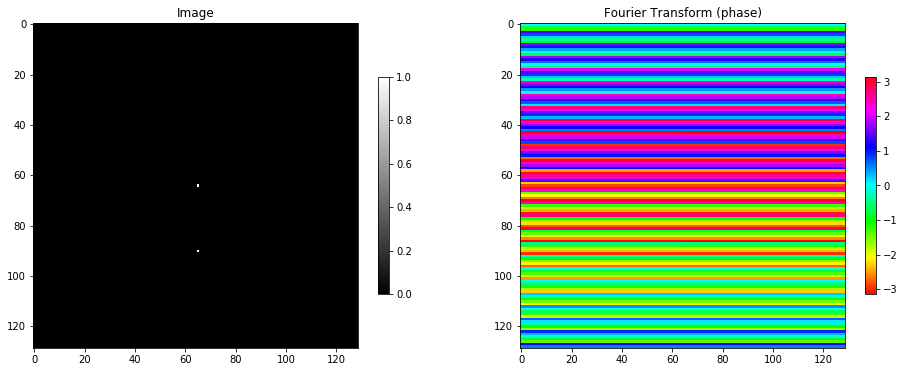

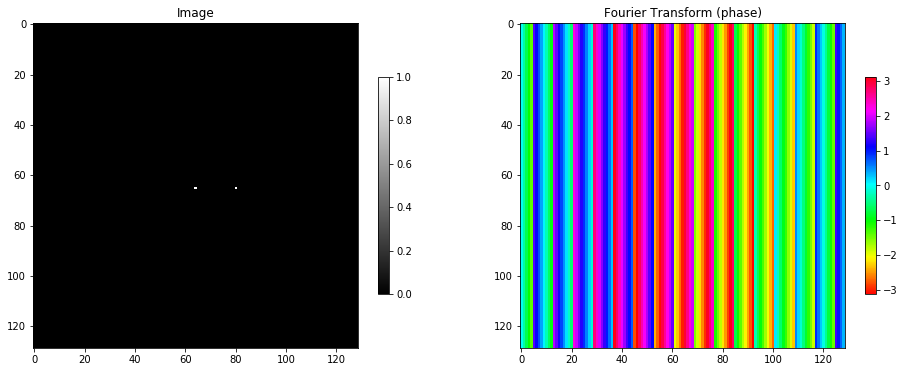

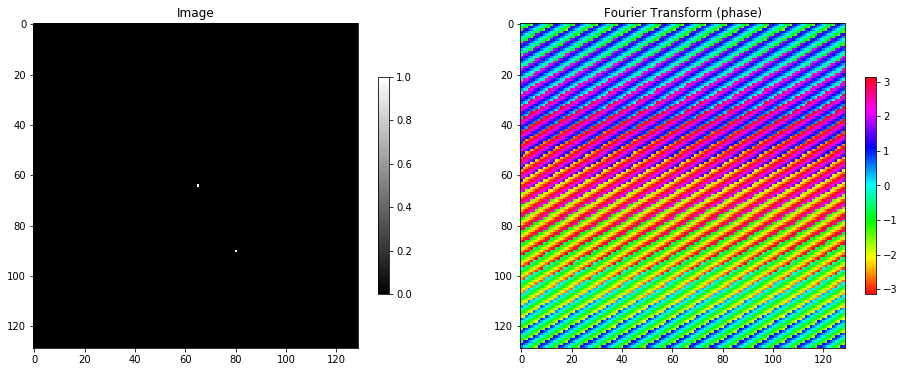

In [38]:
def multipleSourcesFFT(imgSize, pos, amp):
    img = np.zeros((imgSize+1, imgSize+1)) #odd sized array such that there is a central pixel
    for p,a in zip(pos, amp):
        img[p[0], p[1]] = a #make the central pixel have an intensity of 1
    
    fftImg = np.fft.fft2(np.fft.fftshift(img)) #compute the Fourier transform of the image
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.title('Image')
    plt.imshow(img, interpolation='nearest')
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1,2,2)
    plt.title('Fourier Transform (phase)')
    plt.imshow(np.angle(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)
    
    #amplitudes are all 1.
    print('FFT Max:', np.max(np.abs(fftImg)), 'Min:', np.min(np.abs(fftImg)))

imgSize = 128

multipleSourcesFFT(imgSize, [[64, 65], [90,65]], [1., 1.])

multipleSourcesFFT(imgSize, [[65, 64], [65,80]], [1., 1.])

multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 1.])

*左：双点源图，点源幅值为1。右：双点源的空间频率相位。Left: position of two point sources, each with an amplitude of 1. Right: the resulting spatial frequency phases.*

从上面的运行结果可以看出，相位图中有两个不同的正弦波。第一个波从上往下变换较慢，原因在于对应的源距离图像中心很近。第二个波随着对应源的位置变化，其频率和方向发生改变。第一行图可以看出，由于两个源在x方向对齐，所以两者的相位方向都是从上往下，但是频率有所不同。第二行中，由于两个源在y方向对齐，所以相位从左往右排列。第三行的第二个波的相位跟第一个波的相位呈夹角，因为第二个源不在第一个源的水平或者垂直线上。

From these figures we can see there are two different sinusoidal waves in the phase plots, The first is a slowly varying wave going top to bottom due to the source near the centre of the image. The second wave changes frequency and direction based on the position of the second source. From the first row we can see that because the sources are aligned in $x$, then the phase of both goes top to bottom, but at different frequencies. Similarly, in the second row, the sources are aligned in $y$ and thus both phases go left to right. In the third row we see that the phase is at an angle because of the second source position.

现在，相位不能简单叠加，而是要根据源的幅值进行加权平均。上例中，由于两个源的幅值相等，因此加权平均就是简单平均。

Now, the phases are not added equally, the average phase value at each spatial frequency is a weighted average of each source based on the amplitude of that source. In the previous examples both sources had the same amplitude so the phases were simply an average.

FFT Max: 1.1 Min: 0.9000329471919191
FFT Max: 2.0000000000000004 Min: 0.024352829603994052
FFT Max: 11.000000000000002 Min: 9.000329471919189


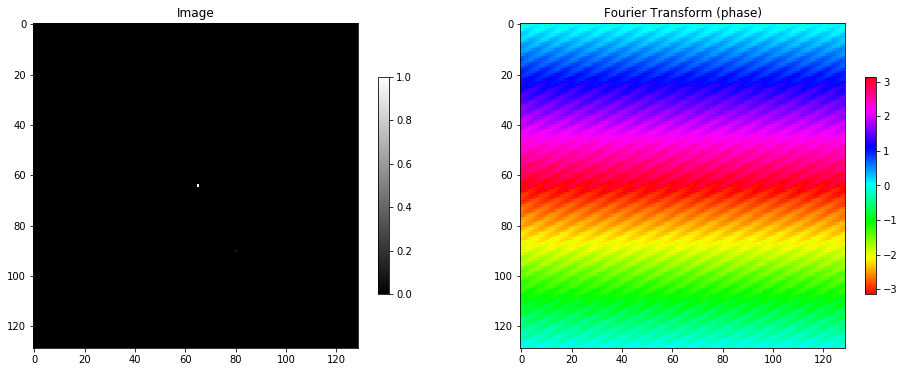

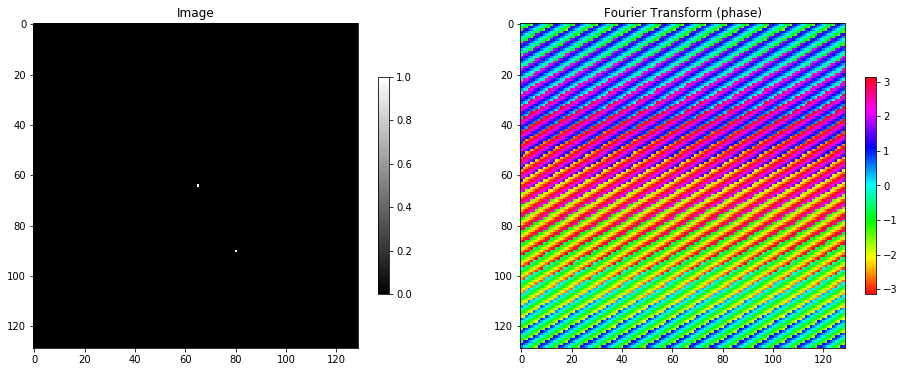

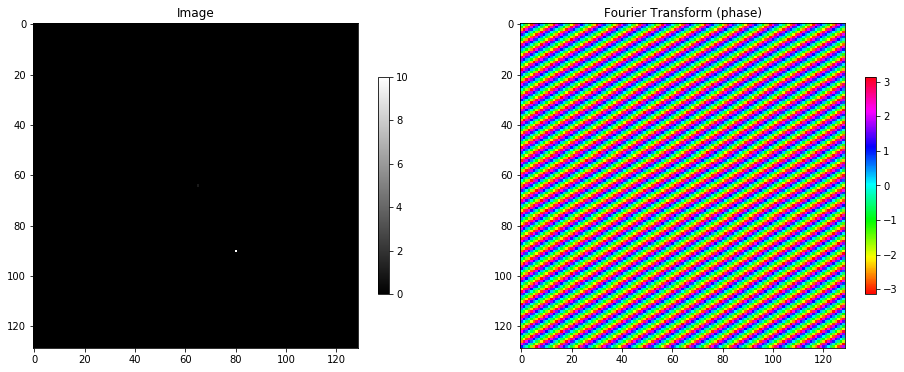

In [39]:
imgSize = 128

multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 0.1])
multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 1.0])
multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 10.])

*左：固定位置的两个点源，中心位置的点源幅值为1，另一个点源幅值分别为0.1、1、10。右：空间频域的相位，每个点的相位值为单个点源相位的加权平均，权重为两个点源的幅值。Left: two point sources at fixed positions with the central source having unity amplitude and the further out source having an amplitude of 0.1, 1, 10 for each row. Right: the resulting phases which are an amplitude weighted average of the phases of each individual source.*

一旦在图像中加入两个以上的源，可以看到，其空间频率相位图变得非常复杂。

Once we start including more than two sources in the image we can see the resulting spatial frequency plots can become very complex.

FFT Max: 1.8 Min: 0.0031074724915090197


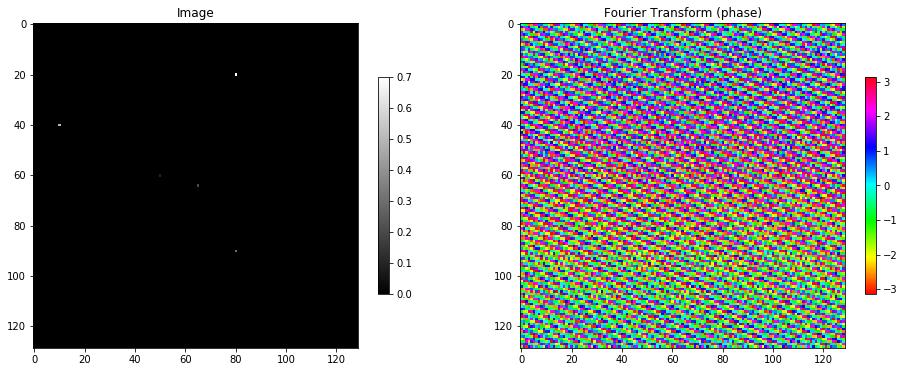

In [40]:
multipleSourcesFFT(imgSize, [[64,65], [90,80], [40,10], [60,50], [20,80]], [.2, 0.3, 0.5, 0.1, 0.7])

*左：五个固定位置的点源，中心位置的源的幅值为0.2，其它4个点源的幅值分别为0.3、0.5、0.1、0.7。右：空间频率相位图，相位值为各点源相位的幅值加权平均。Left: five point sources at fixed positions with the central source having an amplitude of $0.2$ and the further out sources having an amplitude of $0.3$, $0.5$, $0.1$, and $0.7$. Right: the resulting phases which are an amplitude weighted average of the phases of each individual source.*

### 5.1.5 从可见度采样构建图像 Building up an Image from Sampled Visibilities<a id='imaging:sec:ftsampVis'></a>

本节开始我们就已经提到，空域和空间频率域是一组傅立叶对，现在，让我们把这些点源视为空间频率（可见度）域采样，把图像看成是对这些采样进行傅立叶变换的结果。这听起来有点奇怪，接下来让我们用一个例子进行说明。


Now, since we stated at the beginning of this section that the spatial domain and spatial frequency domain are Fourier pairs we can think about these point source examples as a sampling in the spatial frequency (visibility) domain and the resulting Fourier transformed signal as an image using this sampling. This may sound odd, but let us use an example to show what this means.

就从本节开始展示的傅立叶变换鸭子图开始，利用“采样函数”（下节 [$\S$ 5.2 &#10142;](5_2_sampling_functions_and_psfs.ipynb)有更多介绍）对鸭子图的空间频率域进行采样，然后生成新图。

Starting from the Fourier transformed duck image shown at the beginning of the section, we can construct a new image by selecting a few sample points with what is called a *sampling function* (more on this in the next in [$\S$ 5.2 &#10142;](5_2_sampling_functions_and_psfs.ipynb)) in the spatial frequency domain and creating a new image.

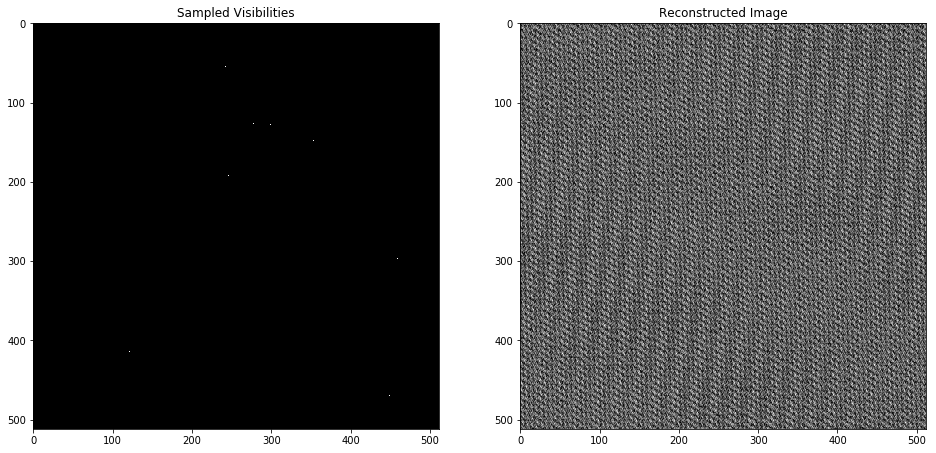

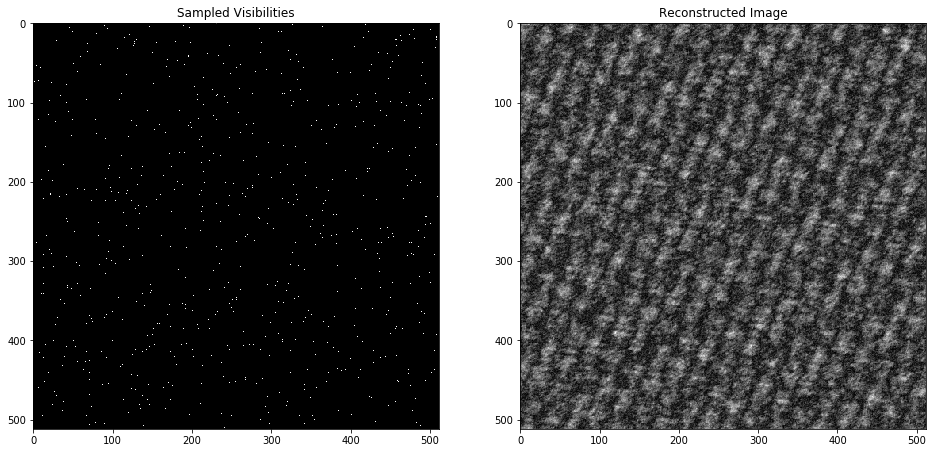

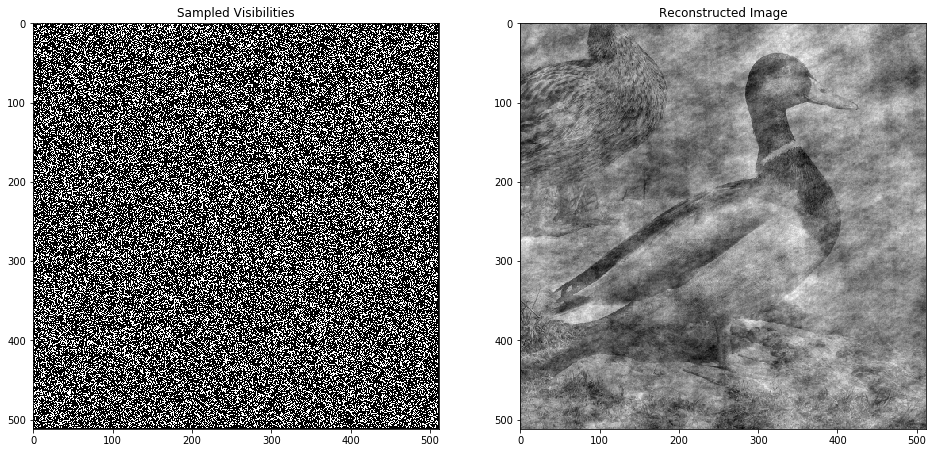

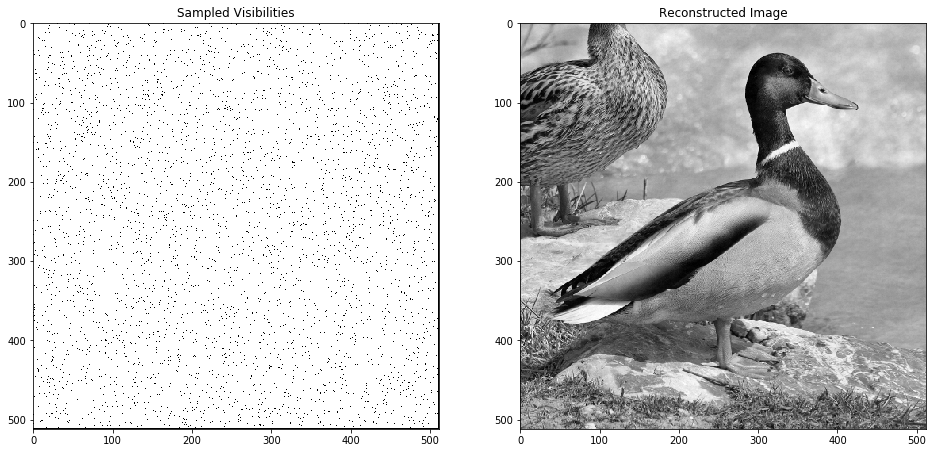

In [43]:
fftDuck = np.fft.fftshift(np.fft.fft2(gDuck))

def reconstructImage(vis, nsamples):
    """randomly select a few values from the spatial frequency (visibility) domain
    and reconstruct the image with those samples. To do a full reconstruction of the
    image, nsamples needs to be larger than the total number of pixels in the image
    because the np.random.randint() chooses with replacement so positions will be
    doubles counted"""
    subVis = np.zeros_like(vis)
    ypos = np.random.randint(0, vis.shape[0]-1, size=nsamples)
    xpos = np.random.randint(0, vis.shape[1]-1, size=nsamples)
    subVis[ypos, xpos] = vis[ypos, xpos] #insert a subset of visibilities
    newImg = np.abs(np.fft.ifft2(np.fft.fftshift(subVis)))
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.title('Sampled Visibilities')
    plt.imshow(np.abs(subVis).astype(bool), interpolation='nearest')
    plt.set_cmap('gray')
    
    plt.subplot(1,2,2)
    plt.title('Reconstructed Image')
    plt.imshow(newImg)
    plt.set_cmap('gray')

reconstructImage(fftDuck, int(1e1))

reconstructImage(fftDuck, int(1e3))

reconstructImage(fftDuck, int(1e5))

reconstructImage(fftDuck, int(1e6))

*图：利用空间频率采样（左）的重建图（右）。Figures: the reconstructed images (right) using the spatial frequency domain sampled positions (left).*

对空间频率进行少量采样，得到的重建图（右上图）看起来只是一些幅值和相位随机的正弦波集合。然而，随着采样点的逐渐增加，重建图上开始出现结构，直到最终重现原始的鸭子图像。本质上来讲，我们是选择了一些空间频率，并赋予不同的幅值，然后生成图像，我们只是恰好就选中了重建的鸭子。事实上，我们可以通过恰当设置各个空间频率的幅值和相位，从而构造出任何图像。

By only using a few sampled spatial frequency modes the resulting image (top right) looks only like a collection of sinusoidal waves with random amplitudes and orientations. But, as we progressively increase the number of sampled positions structure starts to appear until eventually the original duck image re-emerges. Basically, we are selecting a collection of spatial frequencies, giving them different amplitudes and creating an image out of those components, we just happen to be picking ones such that we are constructing a duck. But, any image can be constructed by setting the correct amplitudes and phases of various spatial frequencies.

从最后一张图我们可以看到，虽然没有对可见度空间进行全采样，但是采样点已经覆盖了大多数位置，因此，很难看出重建图和原始图的区别。不需要对空间频率进行全采样，我们就能重建出跟原图几乎一样的图像，这一点非常重要。这将引入下一节我们将面临的仪器物理限制问题，以及如何通过干涉测量可见度数据获得图像。

In the final image we can see the visibility space is not fully sampled, but since the majority of positions are sampled it is difficult to see any difference in the resulting image compared to the original. This is an important point, we don't need to sample all the spatial frequency modes to reconstruct an image that is very similar to the original. And, this point leads us into the next section where we are faced with physical limits on the instruments we can build and how we construct images from interferometric visibilities.

***

Next: [5.2 Sampling and Point Spread Functions](5_2_sampling_functions_and_psfs.ipynb)